In [2]:
import pandas as pd

In [28]:
df = pd.read_csv("flan-t5_review_out.txt.csv")
df.iloc[3,:]["prediction"]


'This paper provides a compelling theoretical explanation for a large class of adversarial examples. While this is not new, they unify several old perspectives, and convincingly argue for genuinely new scaling relationships. This analysis only seems to work for "well-behaved" models. For models with gradient masking, obfuscated gradients or even non-differentiable models, it is unlikely such analysis is significant.'

In [43]:
df = pd.read_csv("metrics/Bart_review_out.txt.csv")
df.iloc[57,:]


Unnamed: 0                                                            57
gold                   This paper builds upon existing works to prove...
prediction             The authors consider the problem of finding an...
rouge_score                                                     0.159601
bertscore_precision                                             0.710813
bertscore_recall                                                0.698373
bertscore_f1                                                    0.704538
factCC_label                                                   INCORRECT
factCC_score                                                    0.992199
Name: 57, dtype: object

In [ ]:
df['prediction'] = df['prediction'].str.split('\n').str[0]

df.to_csv("bart_review_out.txt.csv", index=False)

In [13]:
df = pd.read_csv("../DistilBart_review_out.txt.csv")
df.iloc[110,:]["gold"]

'This paper describes how to use normalizing flows for selecting features in a way that controls the type-1 error by using a normalizing flow along with MCMC to sample from the null distribution. The majority of the reviewers were positive, however the most confident reviewer was negative. From taking a look at that reviewers concerns, I tend to agree with most of them.\n\nThe paper is titled knockoff-free, which means in the context of this paper that both 1) 1-bit p-values are not used and 2) The full knockoff property is not required, only sampling from complete conditionals are required. Most of the experiments compare knockoff methods to the proposed approach, so it\'s not clear if 1) 1-bit p-values are not great or 2) the model-X process/complete conditional sampling process is better with normalizing flows. The former point is known and the latter point on the best way to sample from the complete conditionals is really the value. \n\nIf we take the paper as, \n\n1) complete cond

In [24]:
has_newline = df['prediction'].str.contains('\n', regex=False)

count_with_newline = has_newline.sum()
total = len(df)

print(f"{count_with_newline} out of {total} predictions contain '\\n' ({count_with_newline / total:.2%})")

0 out of 549 predictions contain '\n' (0.00%)


In [3]:
df = pd.read_csv("evaluation_summary_combined.csv")

In [4]:
df.head()

,model,Prediction-Tokens-Length,ROUGE,BERTScore-F1,BERTScore-precision,BERTScore-recall,FactCC-Score,FactCC-Label-Rate,Disco_EntityGraph,Disco_LexicalChain,Disco_RC,Disco_LC
0,pegasus_review,15.1166,0.0647,0.6737,0.7142,0.6388,0.9316,0.5046,0.0055,0.0089,0.0471,0.0234
1,pegasus_all,13.8215,0.0596,0.6746,0.7183,0.6372,0.9442,0.5483,0.0046,0.0061,0.0343,0.0169
2,flan-t5_review,100.3024,0.1548,0.7725,0.7773,0.7689,0.9519,0.3297,0.4821,1.0437,0.4388,0.1838
3,flan-t5_all,98.5902,0.1440,0.7668,0.7697,0.7651,0.9531,0.2386,0.4309,0.8730,0.3983,0.1665
4,bart_review,85.2623,0.1637,0.7797,0.7909,0.7700,0.9518,0.4098,0.7255,2.7086,2.3403,0.9528


In [5]:
df['Disco_avg'] = df[["Disco_EntityGraph","Disco_LexicalChain",'Disco_RC','Disco_LC']].mean(axis=1)

In [6]:
new_df = df[['model','Prediction-Tokens-Length',"ROUGE", 'BERTScore-F1', "FactCC-Label-Rate",'Disco_avg']]

In [8]:
new_df.to_csv('summary_show.csv')

In [ ]:
import json
from collections import Counter

def load_jsonl(path):
    with open(path, "r") as f:
        return [json.loads(line) for line in f]

def compute_label_overlap(data):
    overlap_stats = Counter()
    total = len(data)

    for entry in data:
        pred_labels = [x["label"] for x in entry.get("factcc_labels", [])]
        gold_labels = [x["label"] for x in entry.get("gold_factcc_labels", [])]

        # Ensure equal length by trimming or skipping if lengths differ
        if len(pred_labels) != len(gold_labels):
            continue

        for pred, gold in zip(pred_labels, gold_labels):
            overlap_stats[(pred, gold)] += 1

    return overlap_stats, total

def main():
    input_path = "outputs/enriched/bart_res_factcc.jsonl"  # change path as needed
    data = load_jsonl(input_path)

    overlap_stats, total = compute_label_overlap(data)

    print("=== FactCC Label Agreement ===")
    print(f"Total examples compared: {total}")
    total_pairs = sum(overlap_stats.values())
    correct_match = sum(count for (pred, gold), count in overlap_stats.items() if pred == gold)
    mismatch = total_pairs - correct_match

    print(f"Matching labels: {correct_match} / {total_pairs} ({100 * correct_match / total_pairs:.2f}%)")
    print(f"Mismatch labels: {mismatch} / {total_pairs} ({100 * mismatch / total_pairs:.2f}%)\n")

    print("Detailed label pair counts:")
    for label_pair, count in overlap_stats.items():
        print(f"{label_pair}: {count}")

if __name__ == "__main__":
    main()


In [12]:
!pip3 install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 3.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]


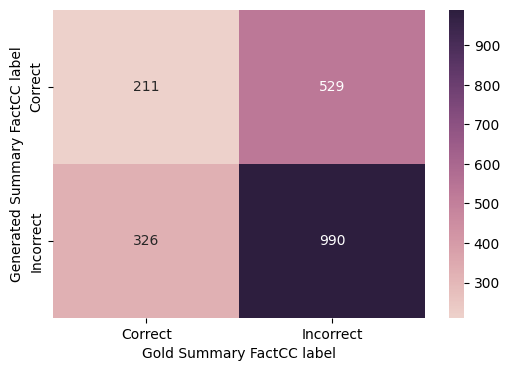

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
data=[[211,529],[326,990]]
sns.heatmap(data,xticklabels=['Correct','Incorrect'],yticklabels=['Correct','Incorrect'], annot=True, fmt=".0f", cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("Gold Summary FactCC label")
plt.ylabel("Generated Summary FactCC label")
plt.show()

In [10]:
import plotly.express as px
data=[[211,529],[326,990]]
fig = px.imshow(data,
                labels=dict(x="predict", y="gold", color="Productivity"),
                x=['CORRECT', 'INCORRECT'],
                y=['CORRECT', 'INCORRECT']
               )
#fig.update_xaxes(side="top")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed